# Clusterização em 10 dimensões

A planilha 'tripadvisor_review.csv', obtida em https://archive.ics.uci.edu/ml/datasets/Travel+Reviews, apresenta dados de avaliações de destinos de viagens da Ásia Oriental, em dez categorias - notas variando de $0$ a $4$. O objetivo deste experimento é utilizar dois métodos de clusterização - **K-means** e **Hierarchical Clustering** - para visualizar os agrupamentos obtidos e tentar, com isso, extrair alguma informação relevante sobre esses dados.

Utilizaremos a linguagem Python.

## Primeiro passo: importar os pacotes usuais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Aplicando o método de clusterização K-means aos dados:

Começamos por salvar no dataframe $X1$ abaixo as $10$ colunas relevantes para o método. A medida de dispersão dos dados em relação aos centróides de cada etapa do algoritmo será o **WCSS** - within-cluster sum of squares. Iremos observá-la para quantidades de clusteres de $1$ a $10$, e escolher a quantidade ideal de clusteres pelo **Elbow Method** - que consiste em observar para qual quantidade de clusteres o WCSS sofre a queda mais acentuada.

In [2]:
dataset1 = pd.read_csv('tripadvisor_review.csv')
X1 = dataset1.iloc[:,1:].values
wcss = [] # lista das 10 medidas de dispersão para as diferentes quantidades de clusteres

O **k-means++** no código abaixo introduz no início do algoritmo, na escolha aleatória de centróides, um passo que impede a ocorrência da chamada "initialization trap" - um viés que pode acabar separando, em clusteres diferentes, dados que mais convenientemente terminariam juntos, ou vice-versa: classificar, no mesmo cluster, dados muito distantes.

Aqui, a distância utilizada é a euclidiana. Provavelmente existem métricas mais convenientes para dez dimensões.

In [3]:
from sklearn.cluster import KMeans

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

## Elbow Method

Abaixo, podemos ver que a queda mais significativa do WCSS se dá na passagem de $n=1$ para $n=2$. Sob essa perspectiva, a melhor divisão se dá com **dois clusteres**.

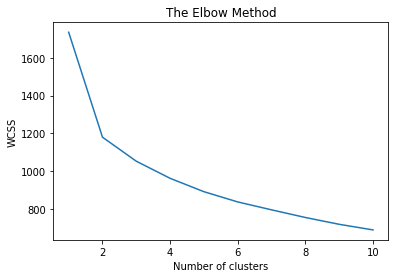

In [4]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Hierarchical Clustering

Diferentemente do k-means clustering, que parte de uma escolha aleatória de um número arbitrário de centróides, o hierarchical clustering parte dos próprios dados, cada ponto sendo um cluster, e segue aglutinando os clusteres passo a passo, de acordo com alguma medida de distância - aqui, novamente, utilizaremos a distância euclidiana. O número conveniente de clusteres aparece no "melhor corte" do dendograma abaixo.

In [5]:
dataset2 = pd.read_csv('tripadvisor_review.csv')
X2 = dataset2.iloc[:,1:].values

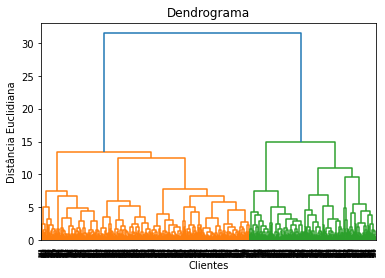

In [6]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X2, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X2)
print(y_hc)

[2 2 1 1 0 1 1 1 0 3 0 3 2 2 2 0 4 0 0 2 4 3 1 1 0 2 2 4 1 2 2 2 0 3 1 4 4
 1 2 1 3 1 4 3 3 1 3 4 3 2 3 2 3 0 1 1 2 1 2 0 2 1 1 1 3 1 4 1 4 4 1 2 3 2
 0 0 1 2 4 3 1 0 1 4 0 3 1 1 0 4 1 1 2 2 0 1 2 0 2 3 1 1 0 1 1 2 0 1 0 0 3
 4 3 4 2 3 0 3 4 4 0 3 0 0 4 1 1 0 3 1 4 0 0 0 3 0 0 0 1 1 3 1 3 1 1 3 3 2
 0 0 3 3 1 3 3 4 3 1 0 4 4 1 3 4 4 1 2 0 2 4 3 1 1 1 1 3 3 4 1 1 1 0 0 4 2
 3 3 1 0 1 2 2 1 3 3 1 4 2 4 0 2 3 2 1 4 1 3 1 4 1 4 2 3 1 1 0 1 4 0 2 3 4
 0 1 2 3 0 4 3 2 1 0 1 1 0 3 0 3 0 1 2 0 3 3 1 4 1 0 1 3 0 1 2 2 1 3 1 0 1
 0 0 0 1 2 1 0 2 0 3 0 3 4 0 2 0 1 0 3 1 3 4 4 2 0 3 1 0 3 4 3 2 1 1 4 1 1
 1 4 0 3 1 2 2 1 0 1 3 2 1 2 3 1 4 0 3 0 2 1 2 1 1 1 0 1 4 0 2 0 0 4 3 2 1
 3 1 0 0 4 3 1 0 2 0 2 4 1 3 4 2 2 1 1 0 4 4 4 3 4 3 4 1 0 0 1 3 0 0 1 4 3
 4 2 1 2 3 2 2 3 1 3 1 1 3 4 1 2 0 1 3 1 0 1 0 1 1 2 4 0 1 0 1 2 1 1 0 0 4
 2 0 2 4 3 0 0 3 2 4 1 1 0 2 0 0 1 4 0 0 1 1 3 2 0 0 0 0 1 1 1 3 1 4 1 3 3
 0 1 3 4 0 0 3 4 0 0 4 4 1 1 2 4 4 3 3 2 1 2 1 1 1 3 2 1 1 3 4 2 4 4 2 0 4
 4 1 0 0 4 3 0 3 1 4 1 1 